4. Apply appropriate ML algorithm on a dataset collected in a cosmetics shop showing details of
customers to predict customer response for special offer.
Create confusion matrix based on above data and find
a) Accuracy
b) Precision
c) Recall
d) F-1 score

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score



In [60]:
# Loading Dataset
df=pd.read_csv("admission.csv")

In [61]:
# Displaying first few rows 
print(df.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1        337          118                  4  4.5  4.5  9.65   
1           2        324          107                  4  4.0  4.5  8.87   
2           3        316          104                  3  3.0  3.5  8.00   
3           4        322          110                  3  3.5  2.5  8.67   
4           5        314          103                  2  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65  


In [62]:
# Drop Serial No. column as it's not a feature
df = df.drop(columns=['Serial No.'])

In [63]:
# Define features and target
X = df.drop(columns=['Chance of Admit'])  # Features
y = df['Chance of Admit'].apply(lambda x: 1 if x >= 0.5 else 0)  # Convert to binary classification (1 if >= 0.5 else 0)

In [64]:
# Split data into training and testing sets
x_train , x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
# Standardize features 
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_text=scaler.transform(x_test)

In [66]:
# Train Logistic Regression Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
# Make predictions
y_pred = model.predict(x_test)

C:\Users\Muskan\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [68]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 0  9]
 [ 0 91]]


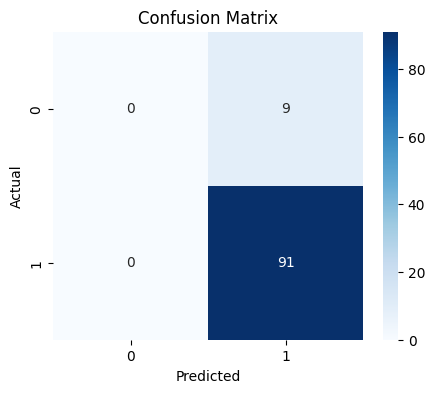

In [69]:
# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [70]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [71]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.91
Precision: 0.91
Recall: 1.00
F1-Score: 0.95
